In [1]:
from datascience import *
%matplotlib inline
path_data = '../../../../data/'
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import math
import numpy as np

### The SD and the Normal Curve ###

We know that the mean is the balance point of the histogram. Unlike the mean, the SD is usually not easy to identify by looking at the histogram. 

However, there is one shape of distribution for which the SD is almost as clearly identifiable as the mean. That is the bell-shaped disribution. This section examines that shape, as it appears frequently in probability histograms and also in some histograms of data.  

### A Roughly Bell-Shaped Histogram of Data ###
Let us look at the distribution of heights of mothers in our familiar sample of 1,174 mother-newborn pairs. The mothers' heights have a mean of 64 inches and an SD of 2.5 inches. Unlike the heights of the basketball players, the mothers' heights are distributed fairly symmetrically about the mean in a bell-shaped curve.

In [2]:
baby = Table.read_table(path_data + 'baby.csv')

In [3]:
heights = baby.column('Maternal Height')
mean_height = np.round(np.mean(heights), 1)
mean_height

64.0

In [4]:
sd_height = np.round(np.std(heights), 1)
sd_height

2.5

/home/choldgraf/anaconda/envs/textbook/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


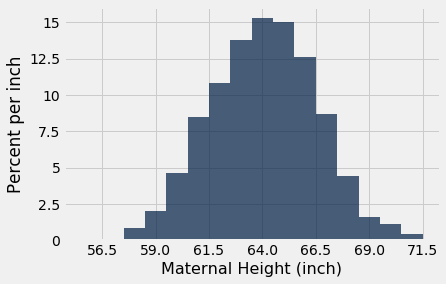

In [5]:
baby.hist('Maternal Height', bins=np.arange(55.5, 72.5, 1), unit='inch')
positions = np.arange(-3, 3.1, 1)*sd_height + mean_height
plots.xticks(positions);

The last two lines of code in the cell above change the labeling of the horizontal axis. Now, the labels correspond to "average $\pm$ $z$ SDs" for $z = 0, \pm 1, \pm 2$, and $\pm 3$. Because of the shape of the distribution, the "center" has an unambiguous meaning and is clearly visible at 64.

### How to Spot the SD on a Bell Shaped Curve ###

To see how the SD is related to the curve, start at the top of the curve and look towards the right. Notice that there is a place where the curve changes from looking like an "upside-down cup" to a "right-way-up cup"; formally, the curve has a point of inflection. That point is one SD above average. It is the point $z=1$, which is "average plus 1 SD" = 66.5 inches.

Symmetrically on the left-hand side of the mean, the point of inflection is at $z=-1$, that is, "average minus 1 SD" = 61.5 inches. 

In general, **for bell-shaped distributions, the SD is the distance between the mean and the points of inflection on either side.**

### The standard normal curve ###

All the bell-shaped histograms that we have seen look essentially the same apart from the labels on the axes. Indeed, there is really just one basic curve from which all of these curves can be drawn just by relabeling the axes appropriately. 

To draw that basic curve, we will use the units into which we can convert every list: standard units. The resulting curve is therefore called the *standard normal curve*. 

The standard normal curve has an impressive equation. But for now, it is best to think of it as a smoothed outline of a histogram of a variable that has been measured in standard units and has a bell-shaped distribution.

$$
\phi(z) = {\frac{1}{\sqrt{2 \pi}}} e^{-\frac{1}{2}z^2}, ~~ -\infty < z < \infty
$$

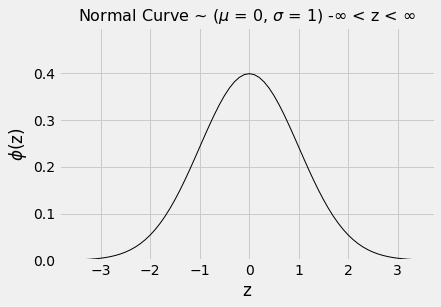

In [6]:
# The standard normal curve

plot_normal_cdf()

As always when you examine a new histogram, start by looking at the horizontal axis. On the horizontal axis of the standard normal curve, the values are standard units. 

Here are some properties of the curve. Some are apparent by observation, and others require a considerable amount of mathematics to establish.

- The total area under the curve is 1. So you can think of it as a histogram drawn to the density scale.

- The curve is symmetric about 0. So if a variable has this distribution, its mean and median are both 0.

- The points of inflection of the curve are at -1 and +1. 

- If a variable has this distribution, its SD is 1. The normal curve is one of the very few distributions that has an SD so clearly identifiable on the histogram.

Since we are thinking of the curve as a smoothed histogram, we will want to represent proportions of the total amount of data by areas under the curve. 

Areas under smooth curves are often found by calculus, using a method called integration. It is a fact of mathematics, however, that the standard normal curve cannot be integrated in any of the usual ways of calculus. 

Therefore, areas under the curve have to be approximated. That is why almost all statistics textbooks carry tables of areas under the normal curve. It is also why all statistical systems, including a module of Python, include methods that provide excellent approximations to those areas.

In [7]:
from scipy import stats

### The standard normal "cdf" ###

The fundamental function for finding areas under the normal curve is `stats.norm.cdf`. It takes a numerical argument and returns all the area under the curve to the left of that number. Formally, it is called the "cumulative distribution function" of the standard normal curve. That rather unwieldy mouthful is abbreviated as cdf.

Let us use this function to find the area to the left of $z=1$ under the standard normal curve. 

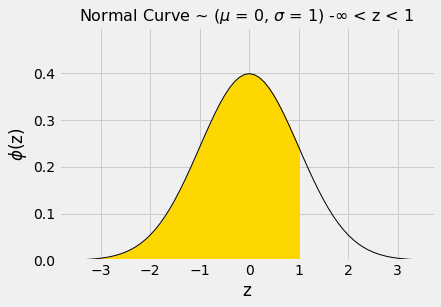

In [8]:
# Area under the standard normal curve, below 1

plot_normal_cdf(1)

The numerical value of the shaded area can be found by calling `stats.norm.cdf`.

In [9]:
stats.norm.cdf(1)

0.8413447460685429

That's about 84%. We can now use the symmetry of the curve and the fact that the total area under the curve is 1 to find other areas. 

The area to the right of $z=1$ is about 100% - 84% = 16%.

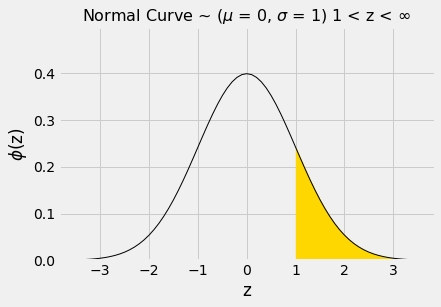

In [10]:
# Area under the standard normal curve, above 1

plot_normal_cdf(lbound=1)

In [11]:
1 - stats.norm.cdf(1)

0.15865525393145707

The area between $z=-1$ and $z=1$ can be computed in several different ways.  It is the gold area under the curve below. 

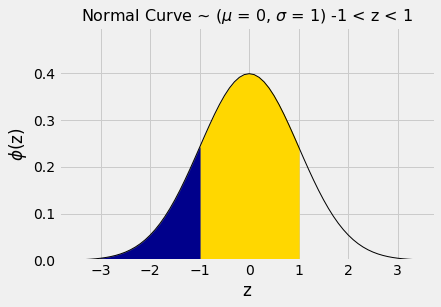

In [12]:
# Area under the standard normal curve, between -1 and 1

plot_normal_cdf(1, lbound=-1)

For example, we could calculate the area as "100% - two equal tails", which works out to roughly 100% - 2x16% = 68%.

Or we could note that the area between $z=1$ and $z=-1$ is equal to all the area to the left of $z=1$, minus all the area to the left of $z=-1$.

In [13]:
stats.norm.cdf(1) - stats.norm.cdf(-1)

0.6826894921370859

By a similar calculation, we see that the area between $-2$ and 2 is about 95%.

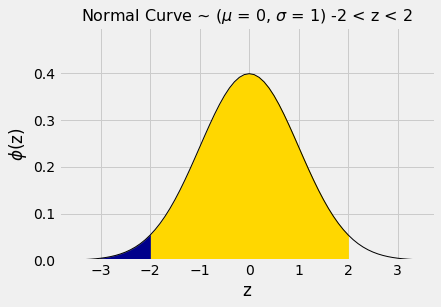

In [14]:
# Area under the standard normal curve, between -2 and 2

plot_normal_cdf(2, lbound=-2)

In [15]:
stats.norm.cdf(2) - stats.norm.cdf(-2)

0.9544997361036416

In other words, if a histogram is roughly bell shaped, the proportion of data in the range "average $\pm$ 2 SDs" is about 95%. 

That is quite a bit more than Chebychev's lower bound of 75%. Chebychev's bound is weaker because it has to work for all distributions. If we know that a distribution is normal, we have good approximations to the proportions, not just bounds.

The table below compares what we know about all distributions and about normal distributions. Notice that when $z=1$, Chebychev's bound is correct but not illuminating.

| Percent in Range   | All Distributions: Bound   | Normal Distribution: Approximation |
| :---------------   | :---------------- --| :-------------------|
|average $\pm$ 1 SD  | at least 0%         | about 68%           |
|average $\pm$ 2 SDs | at least 75%        | about 95%           |
|average $\pm$ 3 SDs | at least 88.888...% | about 99.73%        |